In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.svm import OneClassSVM

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import seaborn as sns

# Support Vector Machines (SVM)
Una maquina de soporte vectorial es un algoritmo flexible y puede resolver problemas como:
1. Clasificación (lineales y no lineales)
2. Regression (lineales y no lineales)
3. Deteccion de ouliers

### Explicación e Intuición

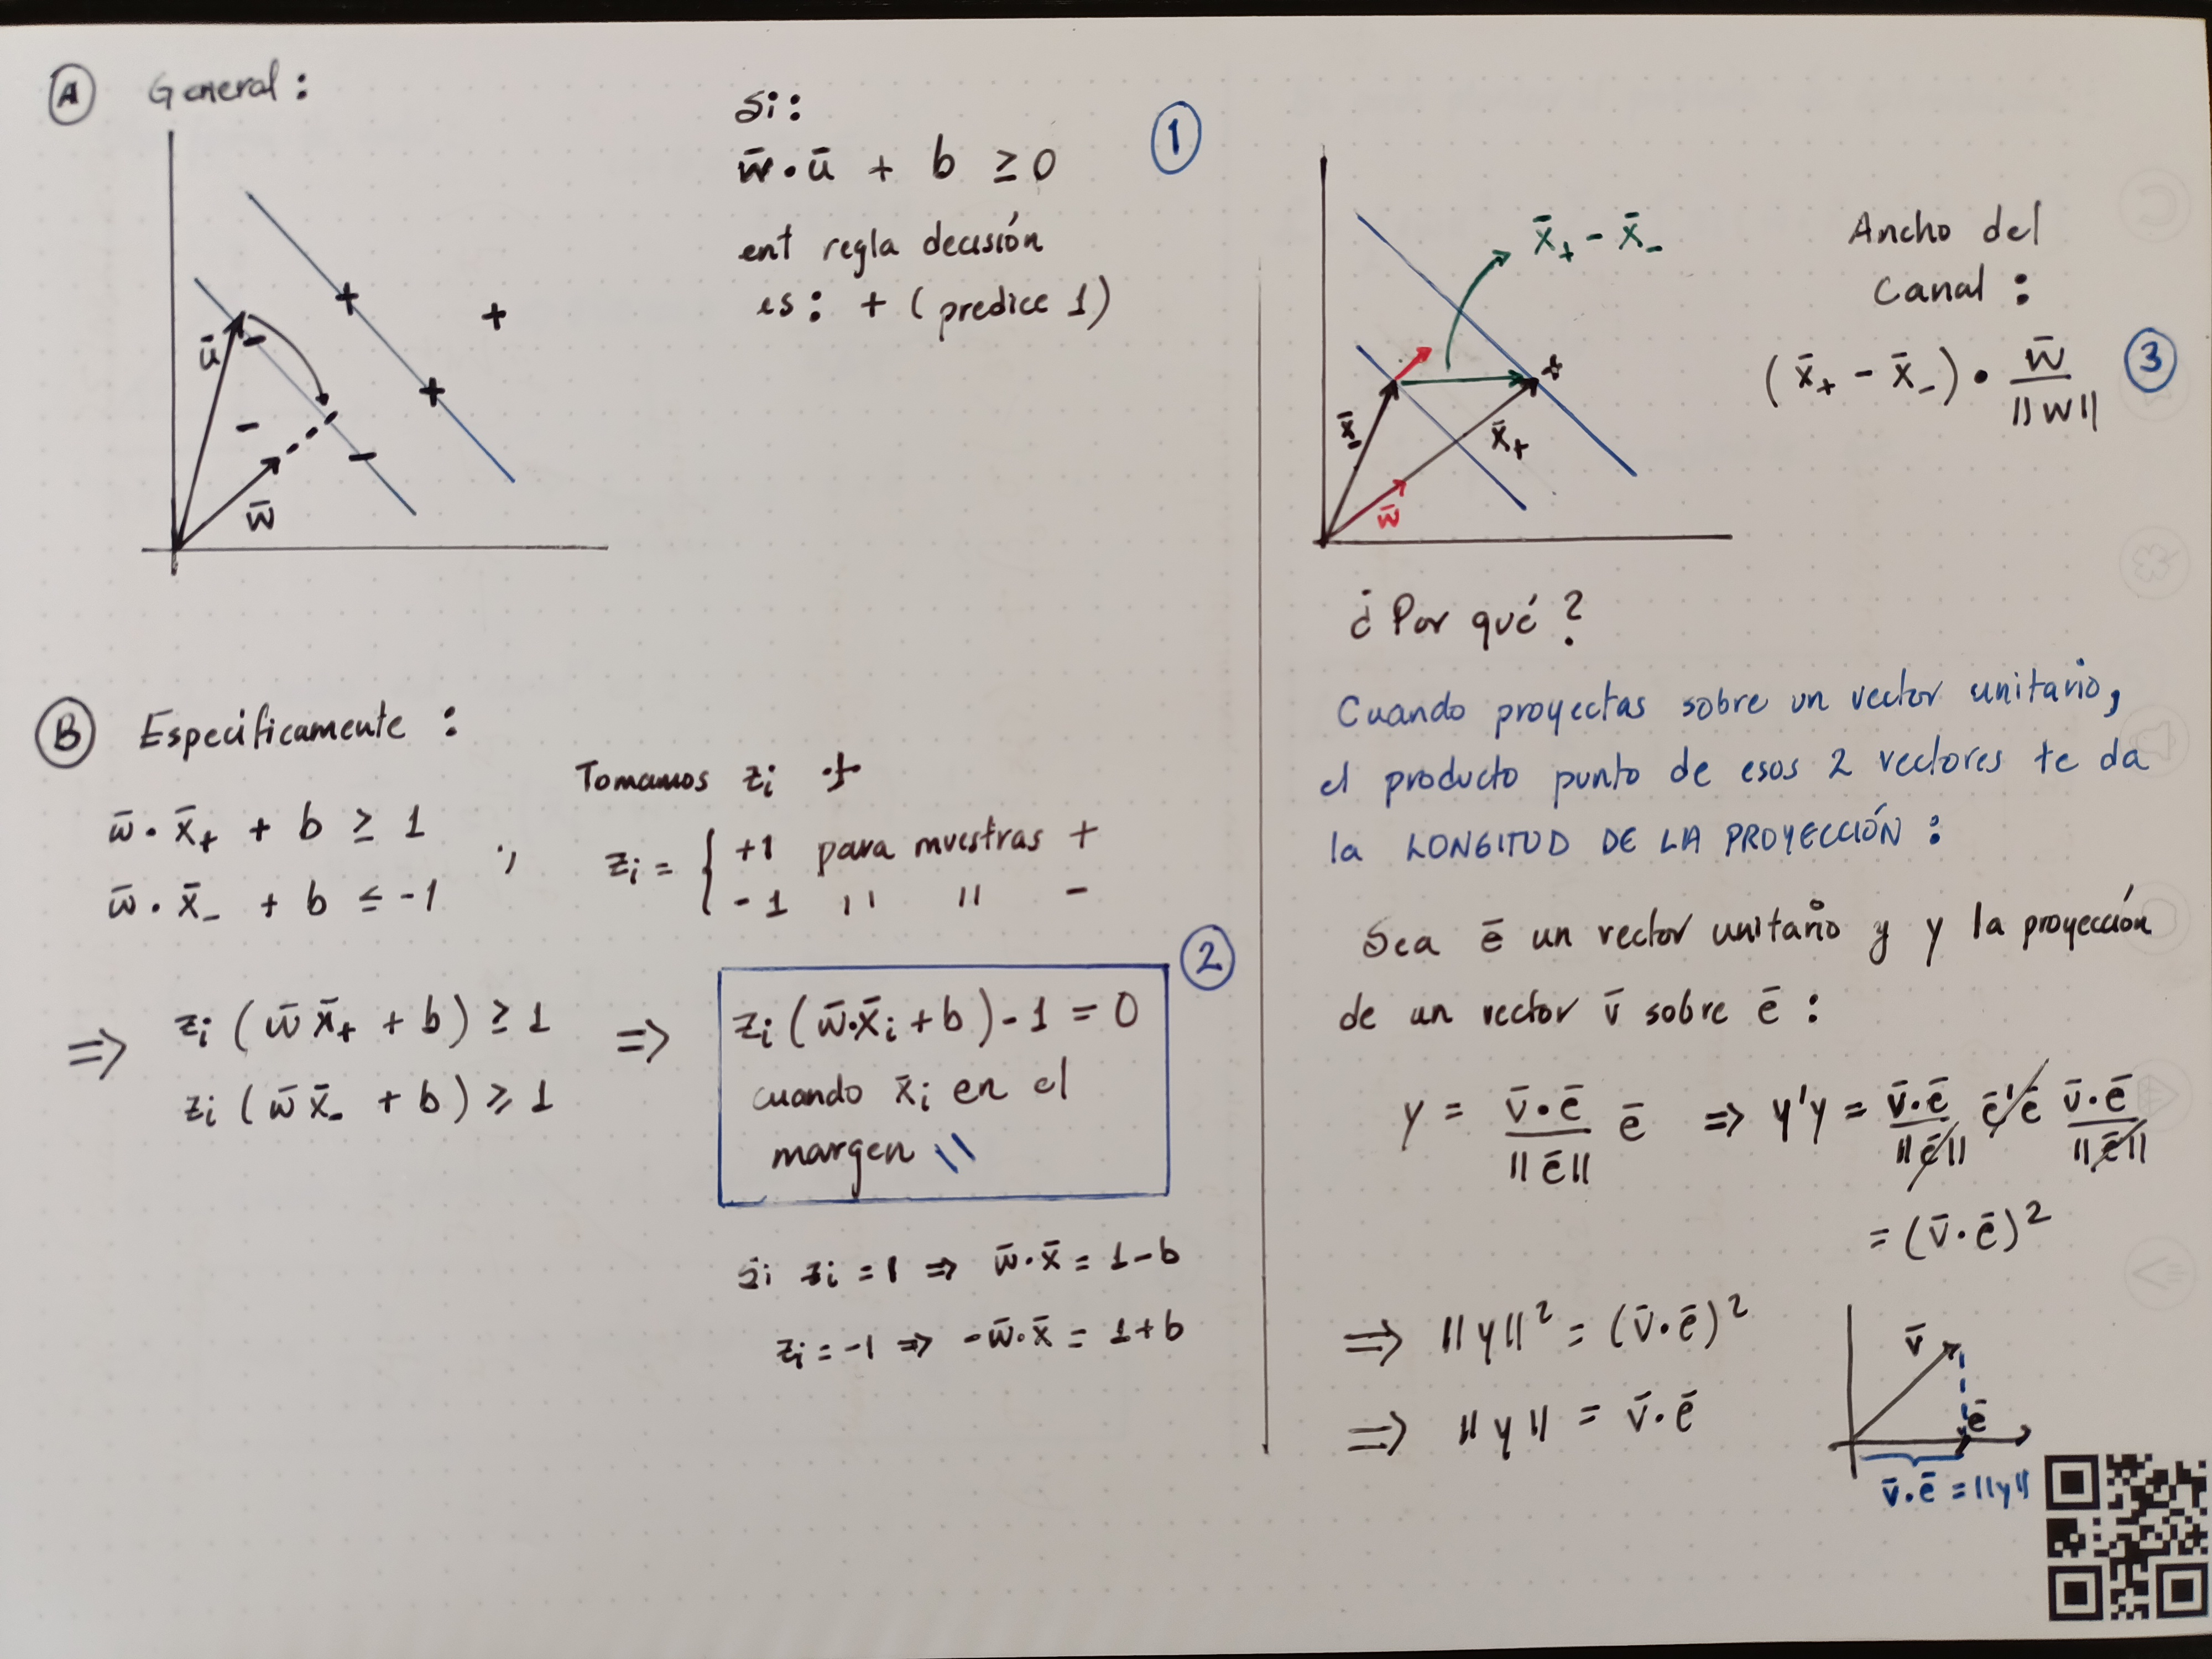

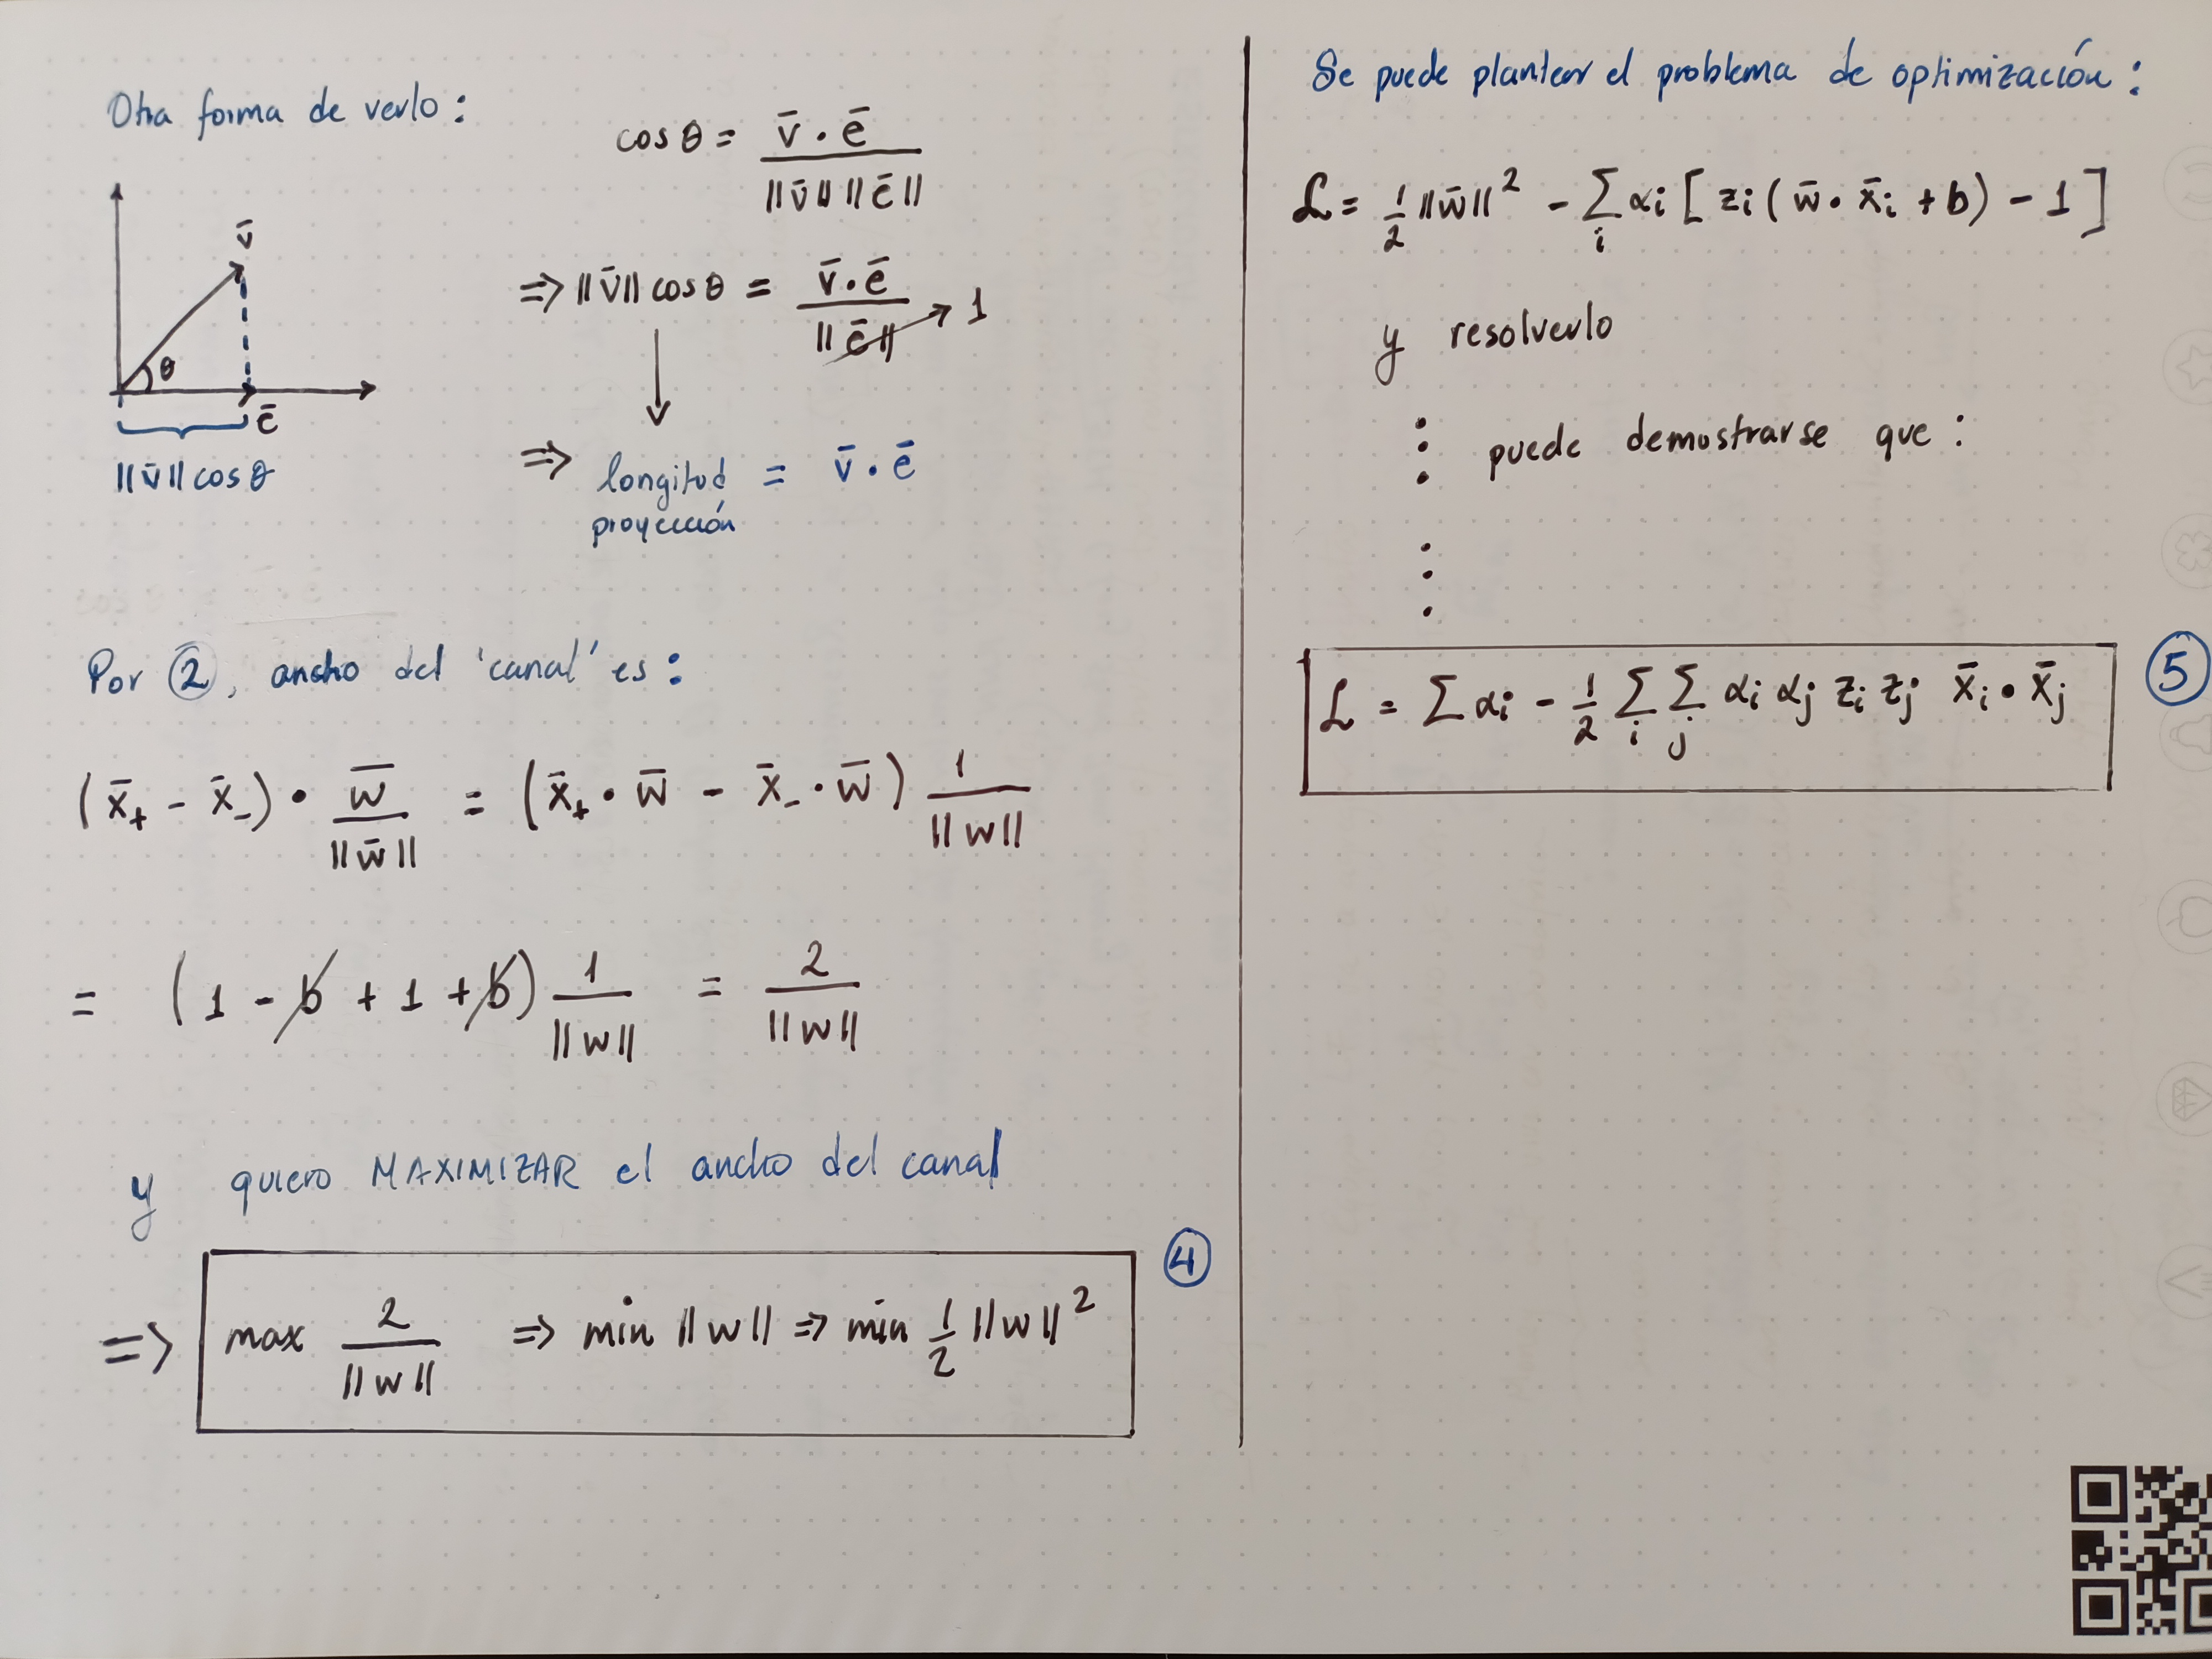

## Clasificacion lineal (linear SVM Classification)
Hablamos de un problema de clasificacion lineal, cuando los datos están distribuidos de tal manera que podamos separar la información con una **linea recta** (de ahí el nombre).

Por ejemplo una regresion logistica es un algoritmo lineal, pues calcula una banda de decisión para separar los datos.

**SVM Classfier: Hard Margin Classification**

En el caso de un *SVM Classifier*, tambien tiene la capacidad de calcular una banda de decisión (conocido como **hard margin classification**), sin embargo tiene sus caracteristicas:

1. Calcula una banda de decision considerando 2 limites (inferior y superior) los cuales se conocen como *soportes* y se estiman en funcion de los valores de los datos.

2. El algoritmo busca mantener afuera de estos limites todos los datos (aunque tenga que disminuir los limites para que suceda)

3. Esto implica que es sensible a *outliers* y la *escala* de los datos.

4. Pero tambien significa que si el problema es linealmente separable, nuevas observaciones no van a realizar un cambio notable sobre la banda de decision y los limites calculados, (a diferencia por ejemplo de una regresión logistica).

El objetivo de una SVM en un problema de clasificacion es calcular los soportes los más alejados del uno del otro, para que se maximice el margen de distancia entre ellos y a la vez que no haya ninguna observación dentro de este margen (esto generaliza mejor que un margen pequeño).

Supongamos que tenemos un conjunto de puntos de datos de entrenamiento, cada uno con un vector de v. predictoras $\mathbf{x}$ y una etiqueta de clase correspondiente $y$. Nuestro objetivo es encontrar un hiperplano en el espacio de características que pueda separar los puntos de datos de diferentes clases con un margen máximo. El hiperplano se puede representar por la ecuación:

$$w^Tx + b = 0$$

donde $\mathbf{w}$ es el vector de pesos, $b$ es el término de sesgo. El hiperplano divide el espacio de características en dos regiones, una para cada clase. Si un nuevo punto de datos $\mathbf{x}$ se encuentra en un lado del hiperplano, se clasificará como una clase, y si se encuentra en el otro lado, se clasificará como la otra clase.

Ahora, queremos encontrar el hiperplano que maximice el margen entre las dos clases. El margen se define como la distancia entre el hiperplano y el punto de datos más cercano de cualquiera de las dos clases. Supongamos que tenemos dos hiperplanos que pueden separar los puntos de datos en dos clases. ¿Cuál deberíamos elegir? La respuesta es el hiperplano que maximiza el margen.

El margen se puede calcular de la siguiente manera:

$\text{distancia}$ = $$\frac{w^T x + b}{|w|}$$

donde $|w|$ es la norma euclidiana del vector de pesos $w$. Para maximizar el margen, debemos minimizar $|w|$ sujeto a la restricción de que todos los puntos de datos se clasifiquen correctamente. Esto se puede formular como el siguiente problema de optimización:

$$\min_{w, b} |w|$$ 
$$\text{ s.t } y_i(w^Tx_i + b) \geq 1 \text{ para todo } i$$

donde $i$ denota el índice de los puntos de datos, y $y_i \in \{-1, +1\}$ son las etiquetas de nuestras clases. La restricción de desigualdad garantiza que todos los puntos de datos se clasifiquen correctamente. Este problema de optimización es un problema convexo y se puede resolver mediante multiplicadores de Lagrange.

Podemos introducir multiplicadores de Lagrange $\alpha_i$ para obtener la forma dual del problema de optimización, que se puede escribir como:

El Lagrangiano es:

 $$\mathcal{L}(w, b, \alpha) = \frac{1}{2} \|w\|^2 - \sum_{i=1}^{n} \alpha_i \left( y_i (w^T x_i + b) - 1 \right)$$


$\text{Minimizando con respecto a  } w:$



$$\frac{\partial \mathcal{L}}{\partial w} = w - \sum_{i=1}^{n} \alpha_i y_i x_i = 0 \implies w = \sum_{i=1}^{n} \alpha_i y_i x_i$$

$\text{Minimizando con respecto a  } b:$

$$\frac{\partial \mathcal{L}}{\partial b} = -\sum_{i=1}^{n} \alpha_i y_i = 0 \implies \sum_{i=1}^{n} \alpha_i y_i = 0 $$

Sustituyendo $w$ en el Lagrangiano, tenemos:

$$\max_{\alpha} \sum_{i=1}^{n} \alpha_i - \frac{1}{2} \sum_{i=1}^{n} \sum_{j=1}^{n} \alpha_i \alpha_j y_i y_j x_i^T x_j$$

$$\text{sujeto a: } \sum_{i=1}^{n} \alpha_i y_i = 0 \quad \text{y} \quad \alpha_i \geq 0 \text{ para toda } i$$ 



Donde $x_i^T x_j$ es el producto punto entre dos vectores de características (variables predictoras). Los $\alpha_i$ son los multiplicadores de Lagrange. El problema de optimización se puede resolver mediante diversos algoritmos de optimización, como el algoritmo de Optimización Secuencial Mínima (SMO).

El vector de pesos $w$ se puede calcular como una combinación lineal de los vectores de soporte, que son los puntos de datos que se encuentran en el margen o cerca de él. El valor de $b$ se puede calcular a partir de los vectores de soporte y la restricción de igualdad en la formulación primal del problema de optimización.

![](https://la.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1671257016063.jpg)

Sólo a manera de entendimiento revisaremos los conceptos con el dataset de iris

In [2]:
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier
svm_clf = SVC(kernel="linear")
svm_clf.fit(X, y)

SVC(kernel='linear')

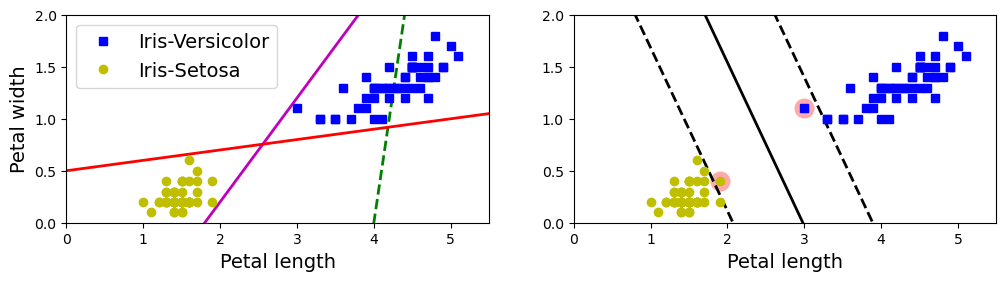

In [3]:
# Plot SVM 
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # En la frontera: w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(12,2.7))

plt.subplot(121)
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.subplot(122)
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

En la figura anterior podemos observar que una SVM genera una banda de 'confianza' (separación) considerando los valores limites de cada clase (lado derecho)

#### Efecto escalamiento de datos

<img src="frontera_esc.png" alt="Alt text" style="width: 700px;"/>

Aqui observamos la sensibilidad que tiene en la escala (y mas en el margen y los soportes que se calculan)

#### Hiperparámetros de Regularización

In [6]:
# Ajustes de hiperparametros C

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.float64)  # Iris-Virginica

# Ajustando un svm con c=1 y c=100
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", dual='auto', random_state=42, max_iter=10000)
svm_clf2 = LinearSVC(C=100, loss="hinge", dual='auto', random_state=42, max_iter=10000)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, dual='auto', loss='hinge', max_iter=10000,
                           random_state=42))])

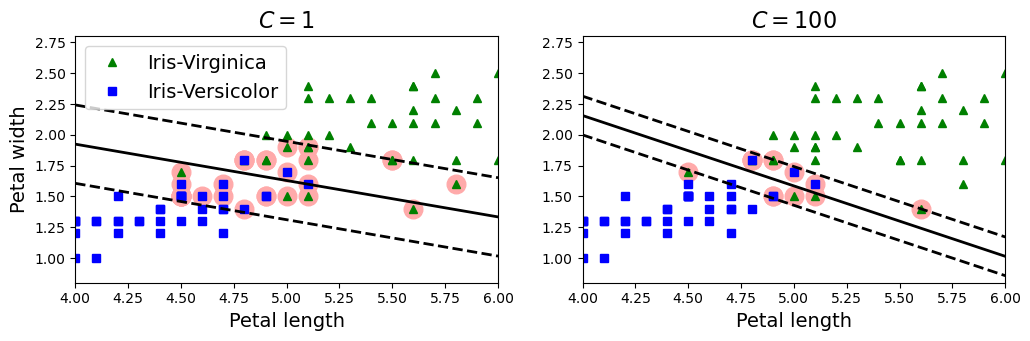

In [5]:
#Hyperparameter C

# escalamiento de parámetros
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Encuentra vectores soporte
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel() # regresa un arreglo continuo, i.e. 2x3 --> 6 elementos
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]


plt.figure(figsize=(12,3.2))
plt.subplot(121)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris-Virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # green triangle
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # blue square
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.show()

El parámetro que nos permite controlar la tolerancia o qué tanto podemos permitir que los datos entren al margen de los soportes es **C**, entre mas grande sea menos tolerancia va a tener (lo que implica disminuir el margen), lo que se traduce enque el modelo se hace más sensible a los datos y por lo tanto incrementa la varianza pero disminuye el sesgo.

**Este parametro es bueno disminuirlo en caso de que el modelo este sobreajustado.**

Concluyendo:
- *SVC Classifier*: es una SVM con hard margin classification de fondo (cuando se define kernel='linear'). 

**Notas:**

Al igual que en los algoritmos anteriores podemos manejar regularizacion (l1,l2) y métodos numéricos para encontrar el mejor conjuntos de parametros.

### Clasificación no lineal (Nonlinear SVM Classification)
Hablamos de un problema de clasificacion no lineal, cuando los datos estan distribuidos de tal manera que no podamos separar la información con una linea recta.

Para abordar este problema existen diversas soluciones.  Por ejemplo,  añadiendo variables calculadas utilizando una función de similitud, es decir, que tan similar es cada observacion dado un valor de referencia (conocido como landmark).

Para calcular estos landmarks, debemos definir una función de similitud y en el ejemplo de aquí utilizamos la *Gaussian Radial Basis Function (RBF)*

Básicamente es una funcion en forma de campana que va de 0 a 1 donde, 1 es que se situa justamente en el landmark, y 0 es que se encuentra muy lejos del landmark.

Una vez definida la función de similitud se calcula la distancia que hay entre el landmark y la observación y el valor se reemplaza en la función definida.

Esto nos arroja nuevas variables, las cuales en ocasiones vueven el problema no lineal en uno lineal por lo que a este metodo se le llama **kernel trick**.

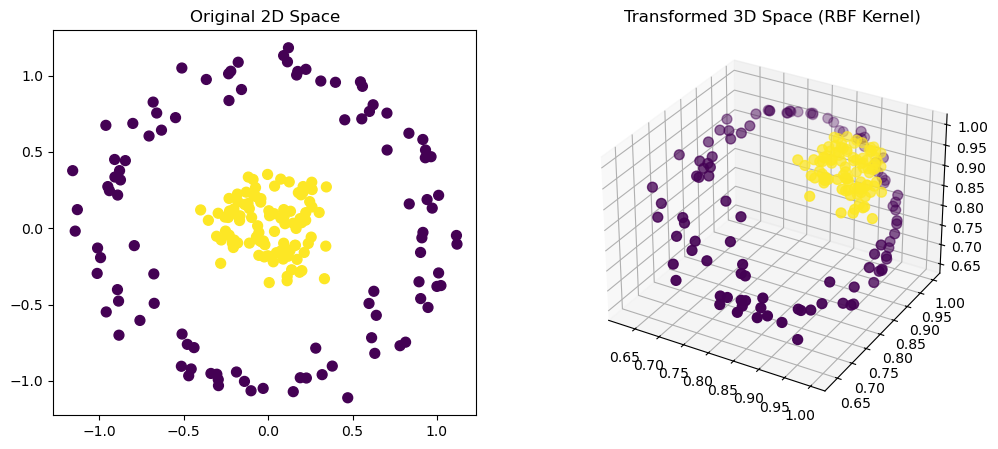

In [7]:
##Visualización kernel trick
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D

# Datos que no son linealmente separables
X, y = make_circles(n_samples=200, noise=0.1, factor=0.2, random_state=42)

# Clasificador SVM con Kernel RBF
svm = SVC(kernel='rbf', C=1, gamma=1/10)
svm.fit(X, y)

# Define el kernel de transformación
def rbf_transform(X, gamma):
    sq_dist = np.sum(X ** 2, axis=1).reshape(-1, 1) + np.sum(X ** 2, axis=1) - 2 * X.dot(X.T)
    return np.exp(-gamma * sq_dist)

# Transform el dataset
X_transformed = rbf_transform(X, gamma=svm.gamma)

# Crear gráfico
fig = plt.figure(figsize=(12, 5))

# 2D plot
ax1 = fig.add_subplot(121)
ax1.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
ax1.set_title("Original 2D Space")

# 3D plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(X_transformed[:, 0], X_transformed[:, 1], X_transformed[:, 2], c=y, cmap='viridis', s=50)
ax2.set_title("Transformed 3D Space (RBF Kernel)")

plt.show()

En una SVM, intentamos encontrar un hiperplano que separe dos clases de puntos de datos. Sin embargo, a veces los puntos de datos no son linealmente separables, lo que significa que un hiperplano no puede usarse para separar los puntos de datos de manera efectiva. En tales casos, podemos usar el truco del kernel para transformar los puntos de datos en un espacio de mayor dimensión donde son linealmente separables.

En el truco del kernel, usamos una función matemática llamada kernel para transformar los puntos de datos en un espacio de mayor dimensión. Esta transformación nos permite encontrar un hiperplano que puede separar los puntos de datos de manera efectiva. La función del kernel es como la banda de goma en nuestra analogía y estira los puntos de datos en un espacio de mayor dimensión.

Por ejemplo, supongamos que tenemos puntos de datos bidimensionales que no son linealmente separables. Podemos usar una función del kernel para transformar los puntos de datos en un espacio tridimensional donde son linealmente separables. En el espacio tridimensional, podemos encontrar un hiperplano que separa los puntos de datos de manera efectiva. Sin embargo, no tenemos que calcular las coordenadas de los puntos de datos transformados explícitamente. En su lugar, usamos la función del kernel para calcular el producto punto entre los puntos de datos transformados. Esto se llama truco del kernel porque nos permite encontrar la solución en el espacio de mayor dimensión sin calcular las coordenadas de los puntos de datos transformados.

En resumen, el truco del kernel es una función matemática que nos permite transformar puntos de datos en un espacio de mayor dimensión donde son linealmente separables. Esta transformación nos permite encontrar un hiperplano que separa los puntos de datos de manera efectiva. El truco del kernel se llama truco porque nos permite encontrar la solución en el espacio de mayor dimensión sin calcular las coordenadas de los puntos de datos transformados.

[Visualización kernel trick con kernel polinomial](https://www.youtube.com/watch?v=3liCbRZPrZA)

## Algunos ejemplos de funciones Kernel:
**Kernel lineal**:
El kernel lineal es la función de kernel más simple, y se utiliza cuando los puntos de datos ya son linealmente separables. Simplemente calcula el producto punto entre dos puntos de datos en su espacio de características original:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \mathbf{x}_i^T \mathbf{x}_j$$

**Kernel polinómico**:
El kernel polinómico se utiliza cuando los puntos de datos no son linealmente separables y requieren una función polinómica de grado superior para separarlos. Se define como:

$$K(\mathbf{x}_i, \mathbf{x}_j) = (\gamma\mathbf{x}_i^T \mathbf{x}_j + r)^d$$

donde $d$ es el grado del polinomio, $\gamma$ es un factor de escala y $r$ es un término constante.

**Kernel gaussiano (RBF)**:
El kernel gaussiano, también conocido como kernel de función de base radial (RBF), es una función de kernel comúnmente utilizada en SVM. Se define como:

$$K(\mathbf{x}_i, \mathbf{x}_j) = e^{-\gamma|\mathbf{x}_i - \mathbf{x}_j|^2}$$

donde $\gamma$ es un factor de escala que controla la anchura del kernel. El kernel gaussiano mapea los puntos de datos en un espacio de características que le permite capturar relaciones no lineales complejas entre los puntos de datos.

**Kernel sigmoide**:
El kernel sigmoide es una función de kernel popular para problemas de clasificación binaria. Se define como:

$$K(\mathbf{x}_i, \mathbf{x}_j) = \tanh(\gamma\mathbf{x}_i^T \mathbf{x}_j + r)$$

donde $\gamma$ y $r$ son términos de escala y constantes, respectivamente.



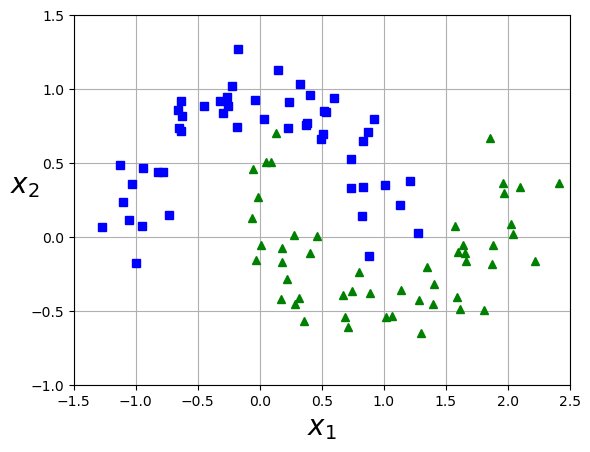

In [8]:
#Creamos un dataset no lineal:

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") #blue square
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")  # green triangle
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**Gaussian RBF Kernel**

Como vimos, utilizar el metodo del polinomio (no el kernel trick) o funciones de similitud, puede ser computacionalmente muy costoso (mas cuando son datasets muy grandes).

Por esta razon podemos ocupar el kernel trick no sólo en el método del polinomio, sino tambien en la funcion de similitud sin tener que añadir las nuevas variables.

In [9]:
#pipeline:

In [10]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = 'rbf', gamma =5, C=0.001))
])
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

Debemos tener presentes las siguientes consideraciones:
1. Incrementar el valor de gamma, hace la curva gaussiana más estrecha (delgada) lo que implica que la influencia en cada observación es menor, creando una banda de decisión más irregular alrededor de las observaciones.
2. Disminuir el valor de gamma, hace la curva más amplia (ancha), lo que implica que la influecnia en cada observación es mayor, creando una banda de decisión mas uniforme y regularizada.

En conclusion gamma, al igual que C, funciona como un parametro de regularizacion del modelo:
1. Overfitting: Reducir gamma y/o C.
2. Underfitting: Incrementar gamma y/o C.

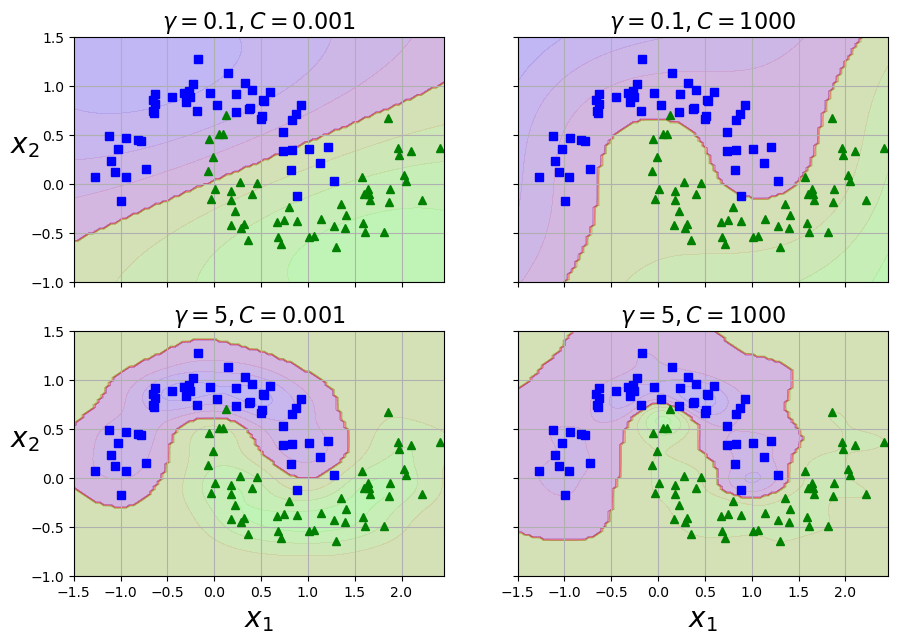

In [11]:
# Hyperparameters Tuning

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

### Aplicación

In [12]:
# Cargamos dataset
data = datasets.load_breast_cancer()

# Asignamos predictoras y respuesta
X = data.data
y = data.target

# Split del dataset en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Estandarizamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#valores podibles de hiperparámetros para Gris Search:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'], 
    'coef0': [-1, 0, 1],
    'shrinking': [True, False],
    'probability': [False],
    'tol': [1e-4, 1e-3]
}

#instanciar el modelo:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv = 5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Mejores hiperparámetros:
print("mejores parámetros: ", grid_search.best_params_)

# Predicción y evaluación del modelo:
y_pred = grid_search.predict(X_test)
print("Confusion matrix :\n ", confusion_matrix(y_test, y_pred))
print("Classification Resport :\n ", classification_report(y_test, y_pred))

mejores parámetros:  {'C': 1, 'coef0': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'probability': False, 'shrinking': True, 'tol': 0.0001}
Confusion matrix :
  [[ 61   2]
 [  2 106]]
Classification Resport :
                precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [15]:
# Cargamos dataset
data = datasets.load_breast_cancer()

# Asignamos predictoras y respuesta
X = data.data
y = data.target

# Split del dataset en training y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Estandarizamos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#valores podibles de hiperparámetros para Gris Search:
param_grid = {
    'C': [0.1, 0.5, 1, 10], #ESTE FUE EL ÚNICO CAMBIO VS MODELO ANTERIOR
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'], 
    'coef0': [-1, 0, 1],
    'shrinking': [True, False],
    'probability': [False],
    'tol': [1e-4, 1e-3]
}

#instanciar el modelo:
svm = SVC()
grid_search = GridSearchCV(svm, param_grid, cv = 5, n_jobs=-1)
grid_search.fit(X_train, y_train)

#Mejores hiperparámetros:
print("mejores parámetros: ", grid_search.best_params_)

# Predicción y evaluación del modelo:
y_pred = grid_search.predict(X_test)
print("Confusion matrix :\n ", confusion_matrix(y_test, y_pred))
print("Classification Resport :\n ", classification_report(y_test, y_pred))

mejores parámetros:  {'C': 0.5, 'coef0': 1, 'degree': 4, 'gamma': 'scale', 'kernel': 'poly', 'probability': False, 'shrinking': True, 'tol': 0.0001}
Confusion matrix :
  [[ 61   2]
 [  1 107]]
Classification Resport :
                precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.98      0.99      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



## One-Class Support Vector Machine

La Máquina de Soporte Vectorial de una clase (OCSVM) es una variante de la Máquina de Soporte Vectorial (SVM) estándar utilizada para la detección de anomalías en lugar de la clasificación. La idea principal es aprender un límite de decisión que separe la mayoría de los puntos de datos (clase normal) de las anomalías (clase de novedad o anormal). El límite de decisión se determina maximizando el margen entre los puntos de datos y el límite.

Dado un conjunto de datos $X = \{x_1, x_2, \ldots, x_n\}$, el objetivo de OCSVM es encontrar una función de decisión $f(x)$ que pueda distinguir entre puntos de datos normales y anormales. En OCSVM, solo tenemos una clase de datos, por lo que el algoritmo intenta encontrar un límite que abarque la mayoría de los puntos de datos mientras minimiza la proporción de puntos considerados como anomalías.

La función de decisión de OCSVM puede representarse como:

$$
f(x) = \text{sign}(\phi(x) - \rho)
$$


Aquí, $\phi(x)$ es una función de mapeo que proyecta los puntos de datos de entrada en un espacio de mayor dimensión, y $\rho$ es un umbral que determina si un punto de datos se considera una anomalía o no. La función de decisión devuelve un valor positivo para los puntos de datos normales y un valor negativo para las anomalías.

Para obtener la función de decisión, OCSVM resuelve el siguiente problema de optimización:

$$
\begin{aligned}
\min_{w, \xi, \rho} \quad & \frac{1}{2} \|w\|^2 - \nu \rho + \frac{1}{n} \sum_{i=1}^n \xi_i \\
\text{s.t.} \quad & (w \cdot \phi(x_i)) \geq \rho - \xi_i, \quad \xi_i \geq 0, \quad i=1, ..., n
\end{aligned}
$$


Aquí, $w$ es el vector de pesos, $\xi_i$ son variables de holgura que miden el grado en que cada punto de datos viola la restricción, y $\nu$ es un parámetro definido por el usuario que controla el equilibrio entre maximizar el margen y minimizar la proporción de anomalías.

La formulación dual del problema de optimización es:

$$
\begin{aligned}
\max_{\alpha} \quad & \sum_{i=1}^n \alpha_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n \alpha_i \alpha_j k(x_i, x_j) \\
\text{s.t.} \quad & 0 \leq \alpha_i \leq \frac{1}{n\nu}, \quad \sum_{i=1}^n \alpha_i = 1, \quad i=1, ..., n
\end{aligned}
$$


En esta formulación, $k(x_i, x_j) = \phi(x_i) \cdot \phi(x_j)$ es la función de kernel que calcula el producto escalar entre los puntos de datos mapeados en el espacio de mayor dimensión. Las funciones de kernel comunes incluyen los kernels lineal, polinomial y de base radial (RBF).

La función de decisión final puede expresarse en términos de las variables duales $\alpha$:

$$
f(x) = \text{sign}\left(\sum_{i=1}^n \alpha_i k(x_i, x) - \rho\right)
$$


Para decidir si un punto $x$ es una anomalía o no, se calcula el valor de la función de decisión $f(x)$. Si $f(x) \geq 0$, entonces el punto $x$ se considera un punto de datos normal. Si $f(x) < 0$, el punto $x$ se considera una anomalía.

En síntesis, OCSVM utiliza la función de decisión $f(x)$ para determinar si un punto de datos es una anomalía comparando el valor calculado de $f(x)$ con el umbral $\rho$. Si el valor es mayor o igual al umbral, el punto se considera normal; de lo contrario, se considera una anomalía.

Visualicemos lo anterior geométricamente

### Visualización One Class SVM

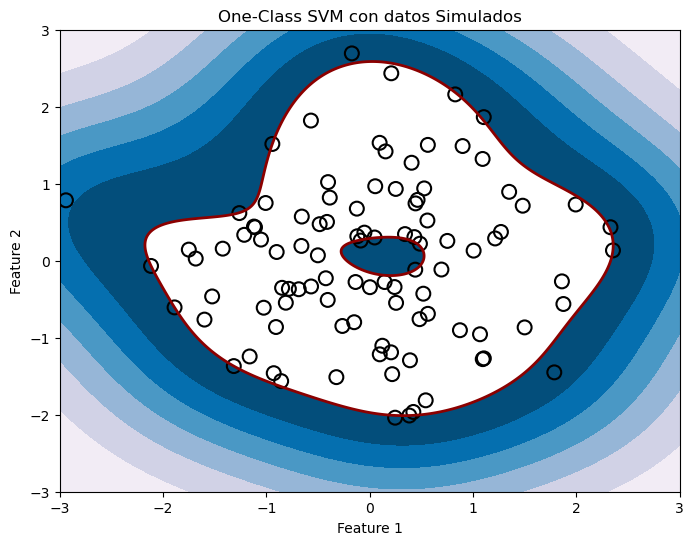

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import OneClassSVM

# Simulando data
X, _ = make_blobs(n_samples=100, centers=1, random_state=42)
X = StandardScaler().fit_transform(X)

# Entrenando One-Class SVM
clf = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto')
clf.fit(X)

# Creando grid
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# frontera de decision 
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
plt.scatter(X[:, 0], X[:, 1], s=100, edgecolors='k', marker='o', facecolors='none', linewidths=1.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('One-Class SVM con datos Simulados')
plt.show()


En el gráfico, la mayoría de los puntos de datos están encerrados por el límite de decisión rojo, que es la región más pequeña posible que contiene la mayoría de los puntos de datos. Cualquier nuevo punto de datos que quede fuera de este límite se puede considerar una anomalía o un valor atípico. En este ejemplo, utilizamos un kernel RBF